# **Airbnb: Basic Analysis on Prices**

In [84]:
#Import important libraries
import pandas as pd
import numpy as np

#load the dataset 
data="Airbnb_India_Top_500.csv"
df=pd.read_csv(data)

In [88]:
# Show the first few rows of the dataset
df.head()

address  isHostedBySuperhost  location/lat  \
0   Manali, Himachal Pradesh, India                False      32.22330   
1   Manali, Himachal Pradesh, India                False      32.22352   
2                        Goa, India                False      15.50400   
3  Bhuntar, Himachal Pradesh, India                False      31.88656   
4          Jaipur, Rajasthan, India                False      26.85991   

   location/lng                                              name  \
0      77.18228                        HighQ Manali / Deluxe Room   
1      77.18152                      Highq manali / 3 BHK Cottage   
2      73.86600       Best view of the river from your terrace 04   
3      77.14467                                          Shabashe   
4      75.66909  Luxurious Independent Studio with Wifi & Kitchen   

   numberOfGuests  pricing/rate/amount                    roomType  stars  
0               3                 8946               Room in hotel    NaN  
1               9                 9124               Room in hotel    NaN  
2               4                 9900        Private room in home   4.00  
3               1                 8684  Shared room in rental unit    NaN  
4               1                20690                Entire condo   4.75

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              500 non-null    object 
 1   isHostedBySuperhost  500 non-null    bool   
 2   location/lat         500 non-null    float64
 3   location/lng         500 non-null    float64
 4   name                 500 non-null    object 
 5   numberOfGuests       500 non-null    int64  
 6   pricing/rate/amount  500 non-null    int64  
 7   roomType             500 non-null    object 
 8   stars                196 non-null    float64
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 31.9+ KB


In [95]:
# Renaming columns for clarity
df = df.rename(columns={
    'location/lat': 'latitude',
    'location/lng': 'longitude',
    'numberOfGuests': 'guest_no',
    'roomType': 'room_type',
    'pricing/rate/amount':'price'
})

In [97]:
# Drop the 'isHostedBySuperhost' column
# df = df.drop(columns=['isHostedBySuperhost'])

In [98]:
# Check for missing values
df.isnull().sum()

address      0
latitude     0
longitude    0
name         0
guest_no     0
price        0
room_type    0
stars        0
dtype: int64

In [99]:
# Filling stars with mean values
df["stars"] = df["stars"].fillna(df["stars"].mean())

### **Exploratory Data Analysis (EDA)**

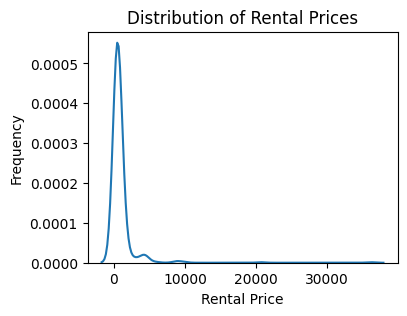

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of rental prices
plt.figure(figsize=(4,3))
sns.kdeplot(df["price"])
plt.title("Distribution of Rental Prices")
plt.xlabel("Rental Price")
plt.ylabel("Frequency")
plt.show()

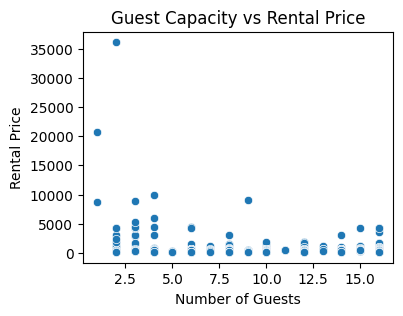

In [104]:
# Plot a scatter plot to observe the relationship between 'guest_no' and 'pricing/rate/amount'
plt.figure(figsize=(4,3))
sns.scatterplot(x=df['guest_no'], y=df['price'])
plt.title('Guest Capacity vs Rental Price')
plt.xlabel('Number of Guests')
plt.ylabel('Rental Price')
plt.show()

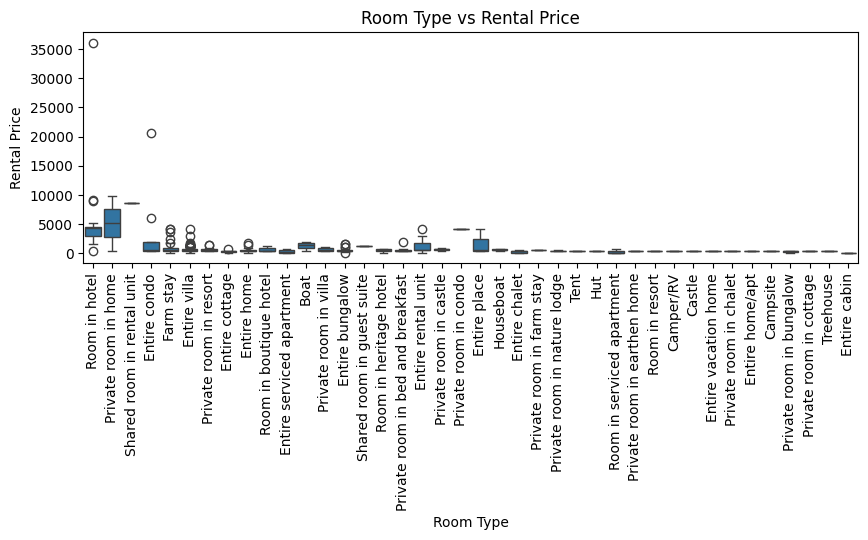

In [110]:
# Boxplot to compare rental prices across room types
plt.figure(figsize=(10,3))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Room Type vs Rental Price')
plt.xlabel('Room Type')
plt.ylabel('Rental Price')
plt.xticks(rotation=90)
plt.show()

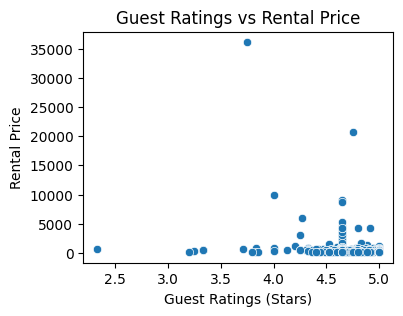

In [112]:
# Scatter plot to observe the relationship between 'stars' and 'pricing/rate/amount'
plt.figure(figsize=(4,3))
sns.scatterplot(x=df['stars'], y=df['price'])
plt.title('Guest Ratings vs Rental Price')
plt.xlabel('Guest Ratings (Stars)')
plt.ylabel('Rental Price')
plt.show()

### **Hypothesis Testing**

**Hypothesis 1: Listings with Higher Guest Capacity Have Higher Prices**

In this hypothesis, we will test whether **listings with more guests** tend to have **higher prices**. The assumption is that larger properties, capable of hosting more guests, will generally come with higher rental costs.

**Null Hypothesis (H0):**  
There is **no significant difference** in prices based on **guest capacity**.  
This means that the number of guests a listing can accommodate does not significantly impact its rental price.

**Alternative Hypothesis (H1):**  
Listings with **higher guest capacity** have **higher prices**.  
This suggests that listings with larger guest capacities (e.g., more bedrooms or space for more guests) are likely to have higher rental prices.


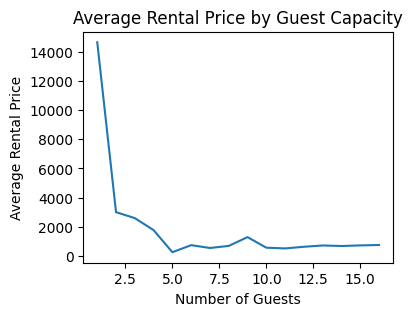

In [133]:
# Calculate the mean rental price by guest capacity
price_by_capacity = df.groupby('guest_no')['price'].mean().reset_index()

# Plot the result
plt.figure(figsize=(4,3))
sns.lineplot(x='guest_no', y='price', data=price_by_capacity)
plt.title('Average Rental Price by Guest Capacity')
plt.xlabel('Number of Guests')
plt.ylabel('Average Rental Price')
plt.show()

**Hypothesis 2: Different Room Types Have Different Average Prices**

In this hypothesis, we will test whether the rental price differs significantly across different **room types**. The expectation is that certain room types, such as **entire homes**, may have higher average prices compared to others, like **private rooms** or **shared rooms**.

 **Null Hypothesis (H0):**  
All room types have the **same average rental price**.  
This means that the average rental price does not differ based on the type of room (entire home, private room, shared room, etc.).

 **Alternative Hypothesis (H1):**  
Different room types have **different average rental prices**.  
This suggests that the average rental price varies depending on whether the room type is an entire home, private room, or shared room.

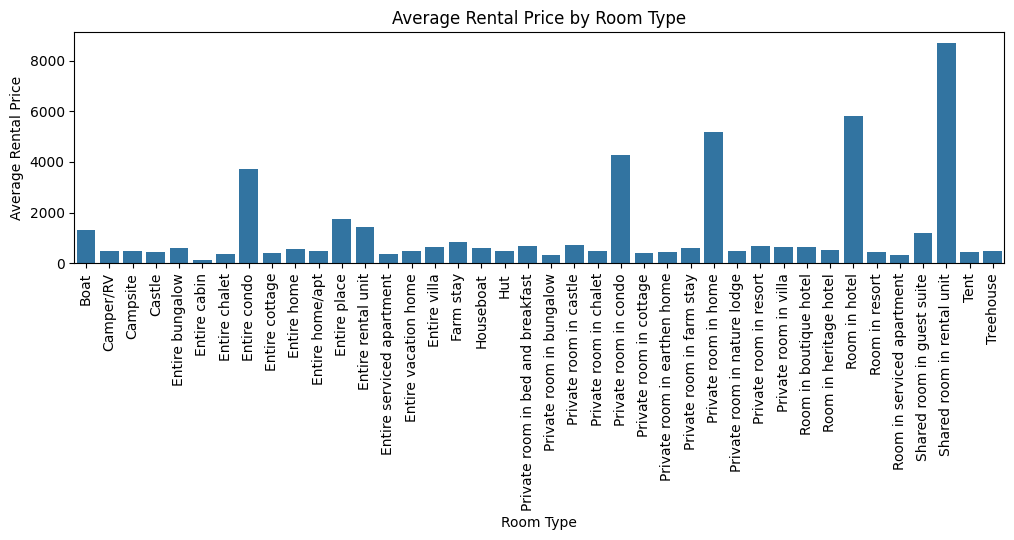

In [127]:
# Calculate the mean rental price by room type
price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()

# Plot the result
plt.figure(figsize=(12,3))
sns.barplot(x='room_type', y='price', data=price_by_room_type)
plt.title('Average Rental Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Rental Price')
plt.xticks(rotation=90)
plt.show()

**Hypothesis 3: There Is a Positive Correlation Between Guest Ratings and Rental Price**

In this hypothesis, we aim to test if higher **guest ratings** (stars) are associated with higher **rental prices**. The expectation is that listings with better guest reviews (higher stars) might justify higher rental prices.

 **Null Hypothesis (H0)**:  
There is **no correlation** between guest ratings and rental price.  
This means that guest ratings (stars) do not influence the pricing of the listing.

**Alternative Hypothesis (H1)**:  
There is a **positive correlation** between guest ratings and rental price.  
This suggests that higher guest ratings (stars) tend to be associated with higher rental prices.

In [132]:
# Calculate correlation between 'stars' and 'pricing/rate/amount'
correlation = df['stars'].corr(df['price'])
correlation

np.float64(-0.1446167128222767)

### **Conclusion and Insights**
Based on the results of our hypothesis testing and data visualization:

#### **Does guest capacity influence rental price?**
 - We observed that listings with higher guest capacity tend to have Lower rental prices.
 - We also saw a negative relationship between price and guest capacity as guest are increasing the price are decreasing 
 - When the number of guest is less than 2, we can see a more rental price are paide by guest 

#### **Do different room types have different average prices?**
 - Yes, there is a significant difference in prices between room types, with entire homes often costing less than private rooms.
 - We can see Shared room in rental unit have higher rental price 

### **Is there a correlation between guest ratings and rental price?** 
  - Correlation is -0.1446, this indicates a weak negative correlation between guest ratings (stars) and rental price.
  - here is a slight tendency that as the guest ratings increase, the rental price slightly decreases, but the relationship is weak. 
  - The correlation is not strong enough to make this a significant trend.